# **<ins style="color:red">Feature Engineering</ins>**
- __Feature Transformation__
  - __Mathematical Transformation__
## **Mathematical Transformations** : convert the data distribution into normal distribution.
- **Log Transform**
- **Reciprocal Transform**
- **Power Transform(sq/sqrt2)**
- **Box-Cox Transform**
- **Yeo-Johnson Transform**

### **What happend after applying the transformation.**
- Data distribution (PDF) is converted into a Normal distribution.

### **<ins style="color:green">Function Transformer</ins>**
- __Sklearn__
  - __Function Transformer__
    - `Log Transform`
    - `Reciprocal Transform`
    - `Sq / Sqrt`
    - `Custom` : Create Your Own formula to transform the columns
  - __Power Transformer__
    - `Box-Cox Transform`
    - `Yeo-Johnson`
  - __Quantile Transformer__

### **How to find if data is normal?**
- sns.histplot(kde=True) visualization
- pandas skew() = 0
- QQ-Plot(statistic)

### **Log Transform**
- Taking log of each value is _log transform_.
- Log Transform is not apply on -ve value.
- Use for `Right Skewed Data`.
- __Right Skewed Data__ ---> __Normal Distribution__
- Linear Model (Linear Regression and Logistic Regression) Perform better on Log Transformation.
- Scaled it linearly.
### **Reciprocal Transform(1/x)**
- All big values become small values and small values become big values.
### **Square Transform(x2)**
- Use for `Left Skewed Data`.
- __Left Skewed Data__ ---> __Normal Distribution__
### **Squared Root Transform(√x)**
- Take square root of each value.

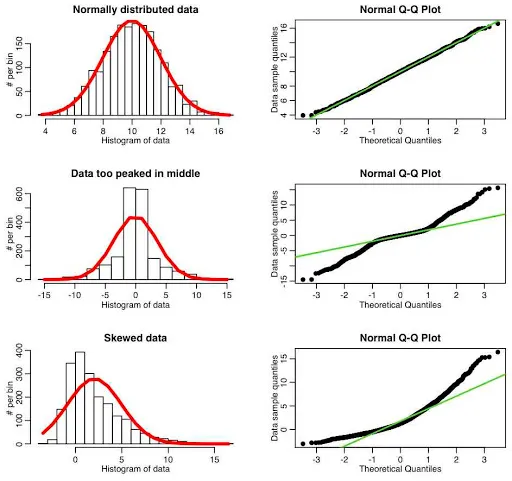

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("../data/train.csv", usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X = df.iloc[:, 1:3]
Y = df.iloc[:, [0]]
# Y=df.drop(X, axis=1)

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.sample(7)

,Age,Fare
111,14.500000,14.4542
255,29.000000,15.2458
114,17.000000,14.4583
676,24.500000,8.0500
763,36.000000,120.0000
45,29.699118,8.0500
813,6.000000,31.2750


/tmp/ipykernel_8063/207189740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


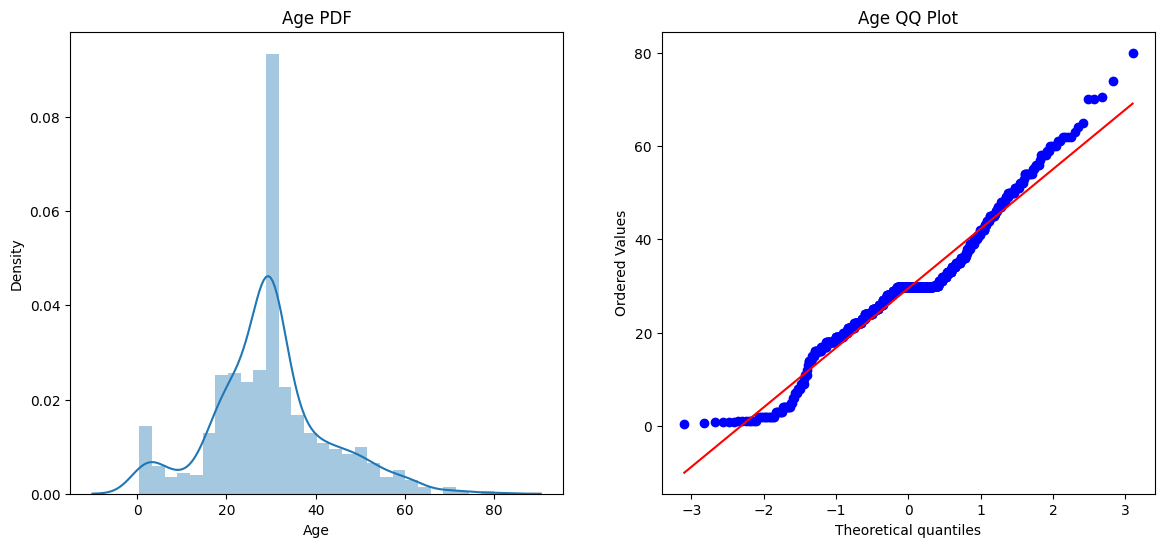

In [10]:
### **How to find if data is normal?**
# sns.histplot(kde=True) visualization
# pandas skew() = 0
# QQ-Plot(statistic)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")

plt.show()

/tmp/ipykernel_8939/391024720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


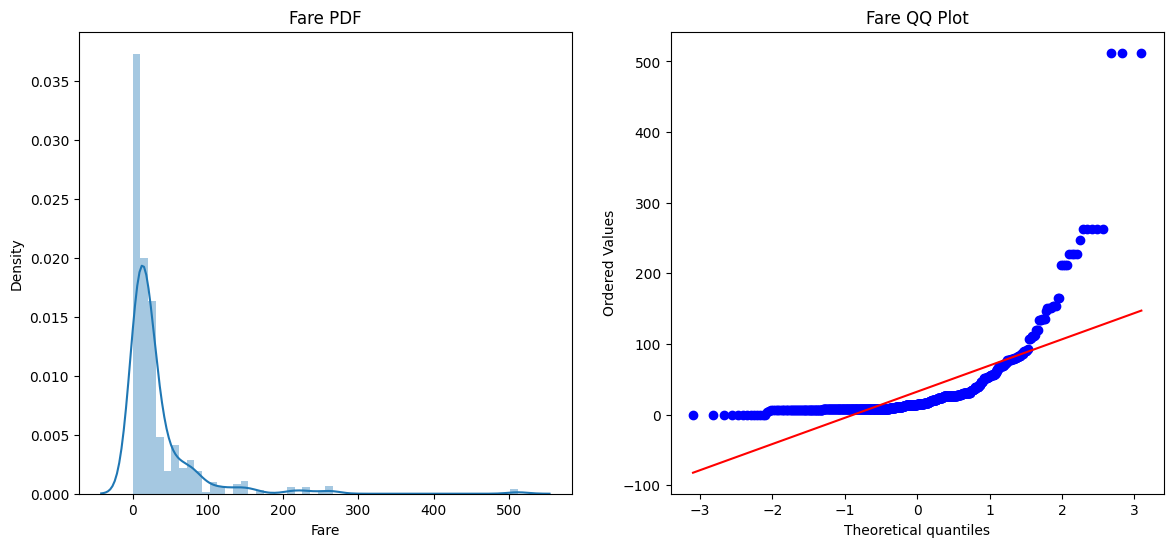

In [27]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [11]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [13]:
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

print("Accuracy LR : ", accuracy_score(y_test, y_pred_lr)*100)
print("Accuracy DTC : ", accuracy_score(y_test, y_pred_dtc)*100)


Accuracy LR :  64.80446927374301
Accuracy DTC :  69.83240223463687


/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- **Apply log transformer on both columns**
- **`np.log()` is normal take log of all value. Here output can be zero for input zero.**
  - np.log(value)
  - if value=0 : np.log(value) : Not Defined
- **`np.log1p()` first add 1 in each value and then take log of that value. So it will give some value for the zero.**
  - np.log1p(value)=np.log(value+1)
  - if value=0 : np.log(value+1) : np.log(1)=0

In [14]:
trf = FunctionTransformer(func=np.log1p)

In [15]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [16]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

lr.fit(X_train_trf, y_train)
dtc.fit(X_train_trf, y_train)

y_pred_lr_trf = lr.predict(X_test_trf)
y_pred_dtc_trf = dtc.predict(X_test_trf)

print("Accuracy LR : ", accuracy_score(y_test, y_pred_lr_trf)*100)
print("Accuracy DTC : ", accuracy_score(y_test, y_pred_dtc_trf)*100)


Accuracy LR :  68.15642458100558
Accuracy DTC :  66.4804469273743


/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Cross Validation**

In [25]:
X_trfd = trf.fit_transform(X)  # transform the hole X

lr = LogisticRegression()
dtc = DecisionTreeClassifier()

# cross_validation : 10 times train_test_split and take everytime accuracy and calculating mean
print("LR : ", np.mean(cross_val_score(lr, X_trfd, Y, scoring='accuracy', cv=10))*100)
print("DTC : ", np.mean(cross_val_score(dtc, X_trfd, Y, scoring='accuracy', cv=10))*100)

LR :  67.80274656679151
DTC :  66.2247191011236


/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

/tmp/ipykernel_8063/4083585129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


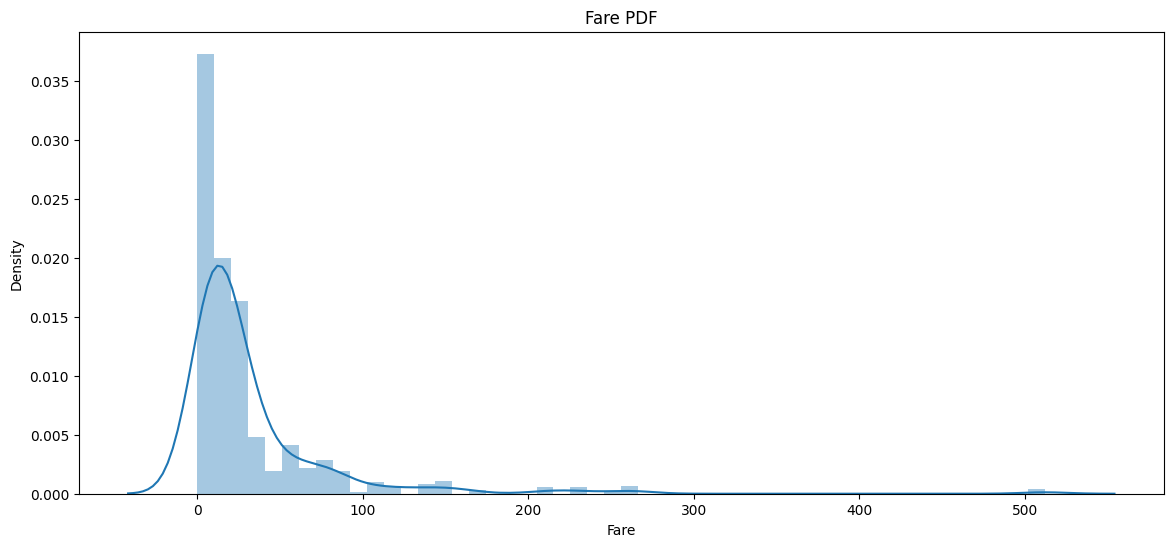

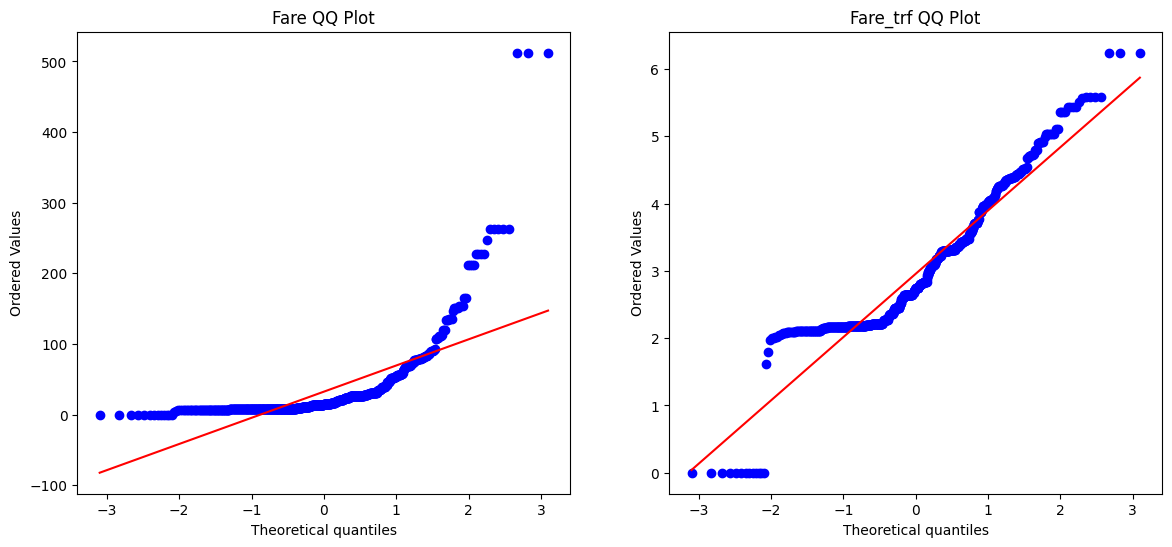

In [29]:
# Fare column
plt.figure(1, figsize=(14, 6))
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.figure(2, figsize=(14, 6))
# X_train['Fare']
plt.subplot(1, 2, 1)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")

# X_train_trf['Fare']
plt.subplot(1, 2, 2)
stats.probplot(X_train_trf['Fare'], dist='norm', plot=plt)
plt.title("Fare_trf QQ Plot")

plt.show()

/tmp/ipykernel_8063/2589076481.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


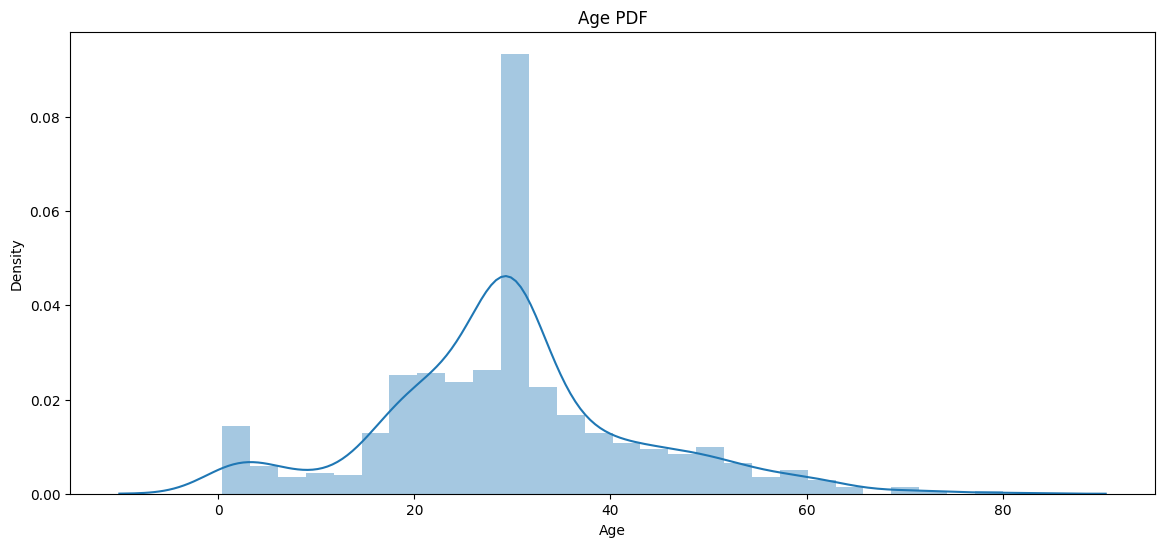

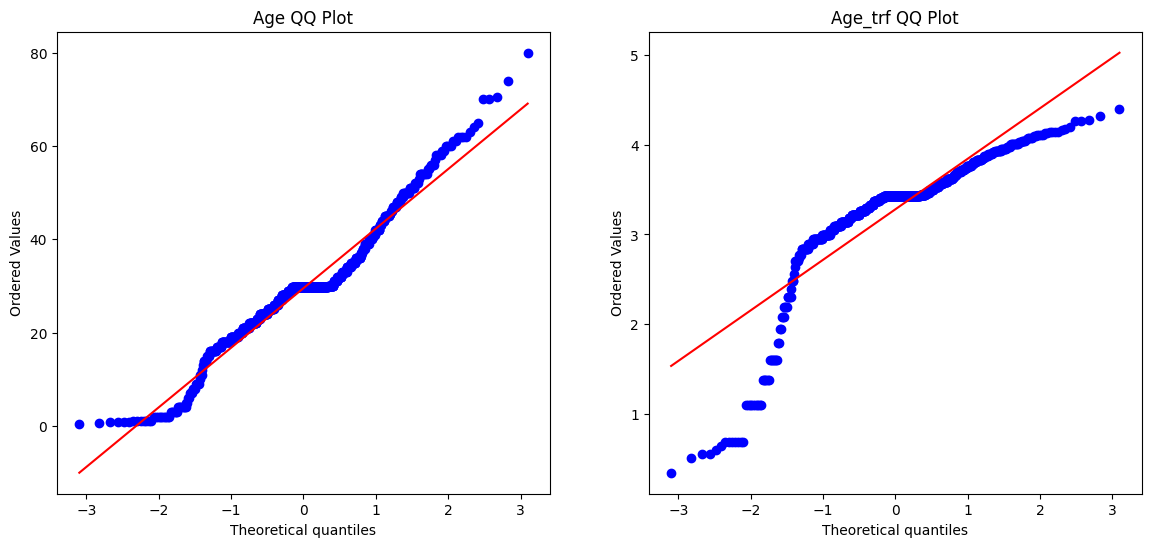

In [31]:
# Trasformered on Age
plt.figure(1, figsize=(14, 6))
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.figure(2, figsize=(14, 6))
# X_train['Age']
plt.subplot(1, 2, 1)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")

# X_train_trf['Age']
plt.subplot(1, 2, 2)
stats.probplot(X_train_trf['Age'], dist='norm', plot=plt)
plt.title("Age_trf QQ Plot")

plt.show()

- **After the transformation the Fare column become normal distributed but Age column become skewed. So apply transformer only on the Fare column**

In [142]:
# only apply tansformer on Fare column
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p, inverse_func=None), ['Fare'])], remainder='passthrough')

# fit the trt2 on X_train['Fare']
X_train_trf2 = trf2.fit_transform(X_train)
X_test_trf2 = trf2.transform(X_test)
# wrong transformation

In [144]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

lr.fit(X_train_trf2, y_train)
dtc.fit(X_train_trf2, y_train)

y_pred_lr2 = lr.predict(X_test_trf2)
y_pred_dtc2 = dtc.predict(X_test_trf2)

print("LR : ", accuracy_score(y_test, y_pred_lr2)*100)
print("DTC : ", accuracy_score(y_test, y_pred_dtc2)*100)


LR :  67.0391061452514
DTC :  67.59776536312849


/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
X_trf2 = trf2.fit_transform(X)

lr = LogisticRegression()
dtc = DecisionTreeClassifier()

print("LR ", np.mean(cross_val_score(lr, X_trf2, Y, scoring='accuracy', cv=10))*100)
print("DTC ", np.mean(cross_val_score(dtc, X_trf2, Y, scoring='accuracy', cv=10))*100)

LR  67.12609238451937
DTC  66.55930087390762


/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [120]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    Y = df.iloc[:, [0]]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)
    lr = LogisticRegression()

    print("Accuracy : ", np.mean(cross_val_score(lr, X_trans, Y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 6))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title("Fare B4 transform")

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title("Fare After transform")

    plt.show()

    

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

Accuracy :  0.6589013732833957


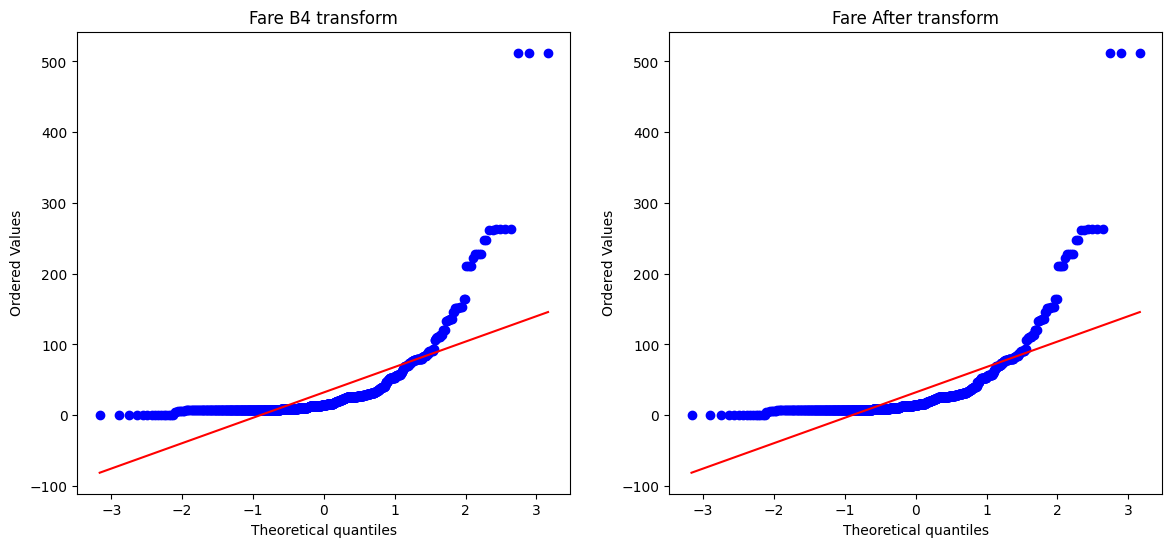

In [121]:
apply_transform(lambda x: x)

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

Accuracy :  0.6442446941323345


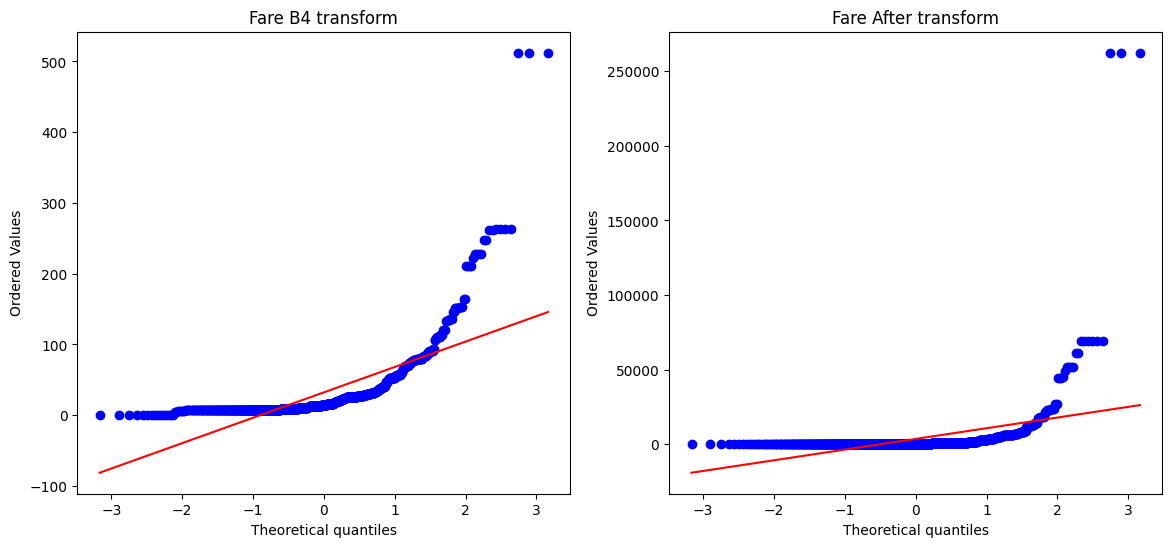

In [122]:
apply_transform(lambda x: x**2)

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

Accuracy :  0.6712609238451936


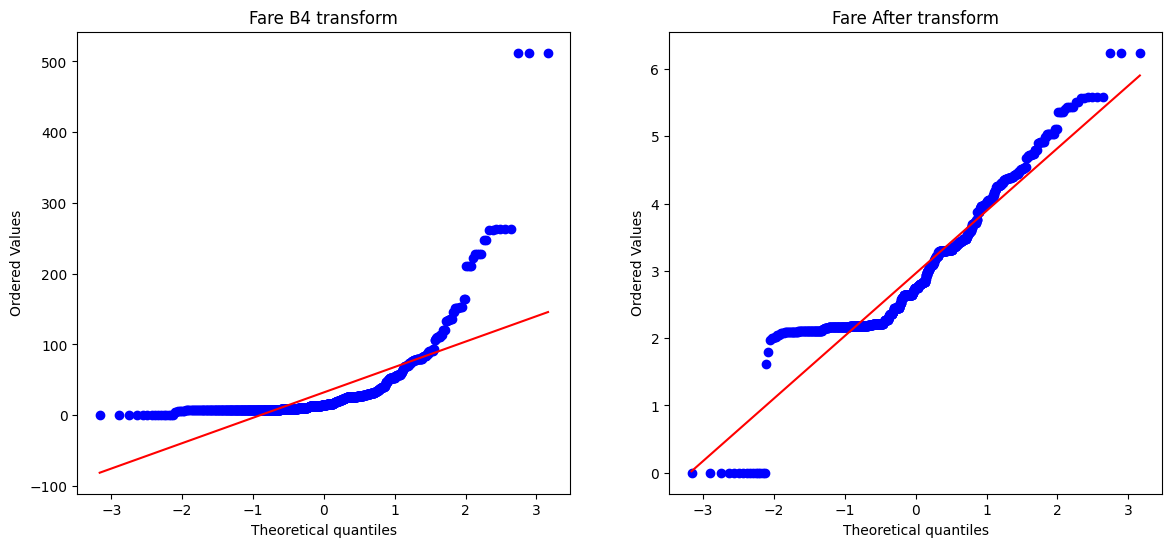

In [123]:
apply_transform(lambda x : np.log1p(x))

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

Accuracy :  0.6589013732833957


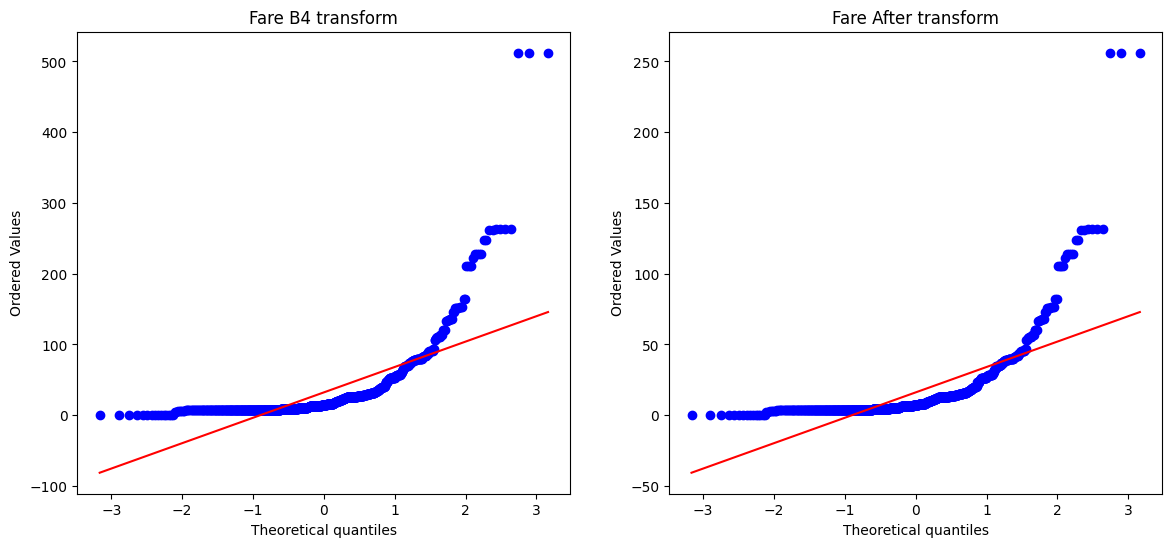

In [124]:
apply_transform(lambda x : x**1/2)

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Accuracy :  0.616167290886392


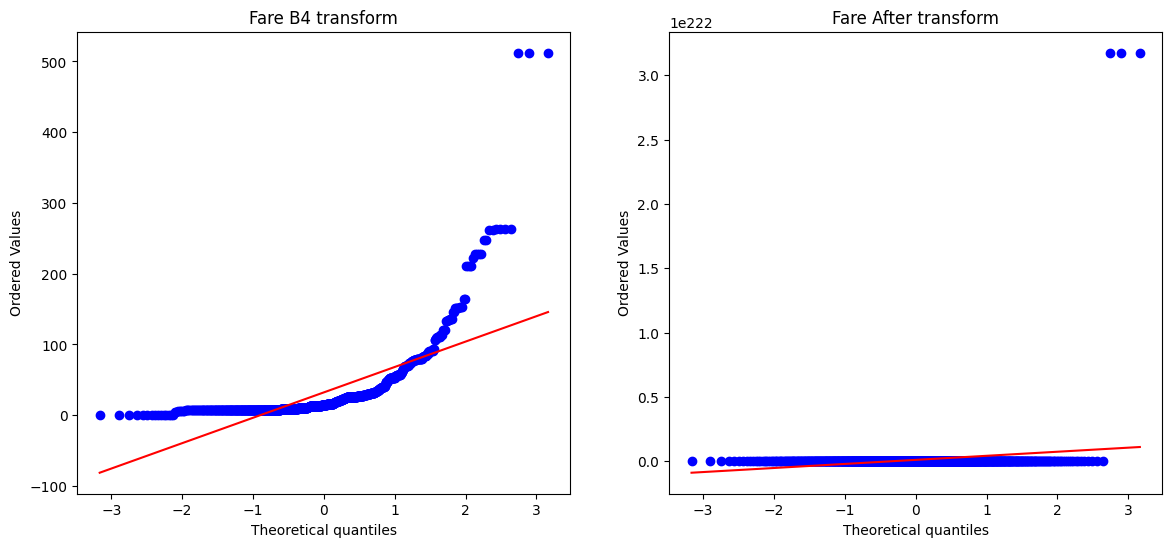

In [125]:
apply_transform(lambda x: np.exp(x))

/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dbda1/miniconda3/envs/Project007/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

Accuracy :  0.61729088639201


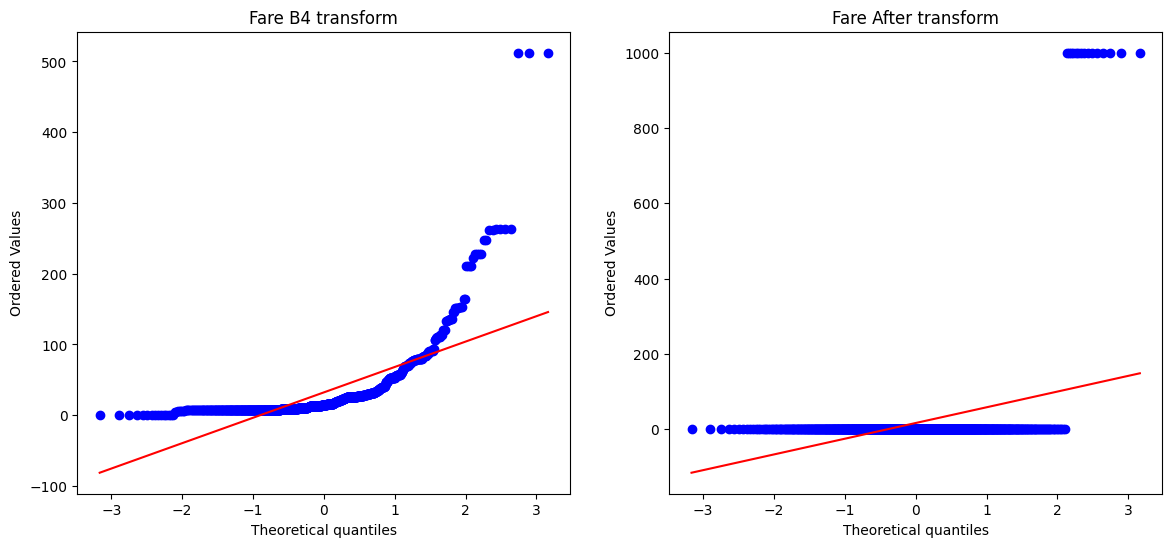

In [140]:
apply_transform(lambda x: 1/(x+0.001))